In [39]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette(sns.color_palette("RdBu_r", 7))

In [23]:
path_train="train.csv"
path_test="test.csv"

data_test = pd.read_csv(path_test)
data_train = pd.read_csv(path_train) 
data_full = pd.concat([data_test,data_train],sort=False)

renamed_columns = {
        'profile pic': 'profile_pic', 'nums/length username': 'nums_div_length_username',
        'fullname words': 'fullname_words','nums/length fullname': 'nums_div_length_fullname',
        'name==username': 'name__username','description length': 'description_length',
        'external URL': 'external_url','private':'private','#posts':'posts',
        '#followers':'followers','#follows':'follows','fake':'fake'
    }
data_test.rename(columns=renamed_columns, inplace=True)
data_train.rename(columns=renamed_columns, inplace=True)
data_full.rename(columns=renamed_columns, inplace=True)

## Descripcion General de los Datos

In [24]:
data_test.shape, data_train.shape

((120, 12), (576, 12))

| Variable|  Definición | Tipo | ¿Es utilizada? | Entrada/Salida |
|:--------------|:--------|:--------|:--------------|:----------------|
|profile_pic| nos indica si la cuenta tiene foto de perfil o no | int64 |Si|Entrada|
|nums_div_length_username| relación entre el número de caracteres numéricos en el nombre de usuario y su longitud |float64|Si|Entrada|
|fullname_words| cantidad de palabras del nombre completo | int64 |Si|Entrada|
|nums_div_length_fullname| relación entre el número de caracteres numéricos en el nombre completo y su longitud |float64|Si|Entrada|
|name__username| si el nombre de usuario y el nombre completo son iguales |int64|Si|Entrada|
|description_length| longitud de la descripción|int64 |Si|Entrada|
|external_url| indica si tiene URL externa|int64 |Si|Entrada|
|private| indica la privacidad de la cuenta|int64 |Si|Entrada|
|posts| indica el numero de  posts|int64 |Si|Entrada|
|followers| indica el numero de seguidores|int64 |Si|Entrada|
|follows| indica el numero de cuentas que sigue|int64 |Si|Entrada|
|fake| indica si la cuenta es falsa o genuina|int64 |Si|Salida|










In [4]:
data_full.head()

profile_pic  nums_div_length_username  fullname_words  \
0            1                      0.33               1   
1            1                      0.00               5   
2            1                      0.00               2   
3            1                      0.00               1   
4            1                      0.50               1   

   nums_div_length_fullname  name__username  description_length  external_url  \
0                      0.33               1                  30             0   
1                      0.00               0                  64             0   
2                      0.00               0                  82             0   
3                      0.00               0                 143             0   
4                      0.00               0                  76             0   

   private  posts  followers  follows  fake  
0        1     35        488      604     0  
1        1      3         35        6     0  
2        1    319        328      668     0  
3        1    273      14890     7369     0  
4        1      6        225      356     0

In [5]:
data_full.describe()

profile_pic  nums_div_length_username  fullname_words  \
count   696.000000                696.000000      696.000000   
mean      0.711207                  0.166609        1.475575   
std       0.453527                  0.218964        1.076622   
min       0.000000                  0.000000        0.000000   
25%       0.000000                  0.000000        1.000000   
50%       1.000000                  0.000000        1.000000   
75%       1.000000                  0.330000        2.000000   
max       1.000000                  0.920000       12.000000   

       nums_div_length_fullname  name__username  description_length  \
count                696.000000      696.000000          696.000000   
mean                   0.042170        0.035920           23.412356   
std                    0.143664        0.186223           38.595721   
min                    0.000000        0.000000            0.000000   
25%                    0.000000        0.000000            0.000000   
50%                    0.000000        0.000000            0.000000   
75%                    0.000000        0.000000           35.000000   
max                    1.000000        1.000000          150.000000   

       external_url     private        posts     followers      follows  \
count    696.000000  696.000000   696.000000  6.960000e+02   696.000000   
mean       0.113506    0.369253   103.244253  7.914991e+04   555.086207   
std        0.317438    0.482950   378.028168  8.428875e+05  1023.613869   
min        0.000000    0.000000     0.000000  0.000000e+00     0.000000   
25%        0.000000    0.000000     0.000000  4.200000e+01    61.000000   
50%        0.000000    0.000000     9.000000  1.655000e+02   252.000000   
75%        0.000000    1.000000    77.000000  6.930000e+02   601.750000   
max        1.000000    1.000000  7389.000000  1.533854e+07  7500.000000   

            fake  
count  696.00000  
mean     0.50000  
std      0.50036  
min      0.00000  
25%      0.00000  
50%      0.50000  
75%      1.00000  
max      1.00000

In [6]:
data_full.isnull().sum()

profile_pic                 0
nums_div_length_username    0
fullname_words              0
nums_div_length_fullname    0
name__username              0
description_length          0
external_url                0
private                     0
posts                       0
followers                   0
follows                     0
fake                        0
dtype: int64

### Correlaciones entre variables

In [25]:
mask = np.zeros_like(data_train.corr())
mask[np.triu_indices_from(mask)] = True
sns.heatmap(
    data_train.corr(),
    annot=True,
    cmap=sns.diverging_palette(600, 28, as_cmap=True),
    linewidths=0.5,
    square=True,
    mask=mask,
    cbar_kws={"shrink": .5}
)
fig=plt.gcf()
fig.set_size_inches(16,10)
plt.show()

## Variable Salida
La variable se salida sera fake, esta puede tener dos posibles valores:
* 0: es una cuenta Genuina
* 1: es una cuenta falsa

### Balanceo de la variable de salida

In [26]:
data_full.fake.value_counts().plot.pie(autopct='%1.0f%%', figsize=(8,8))

Como podemos observar la variable de salida esta perfectamente balanceada lo que impactara positivamente en las predicciones.

## Variable private

Esta variable puede tomar 2 posibles valores:
* 0: Publica
* 1: Privada

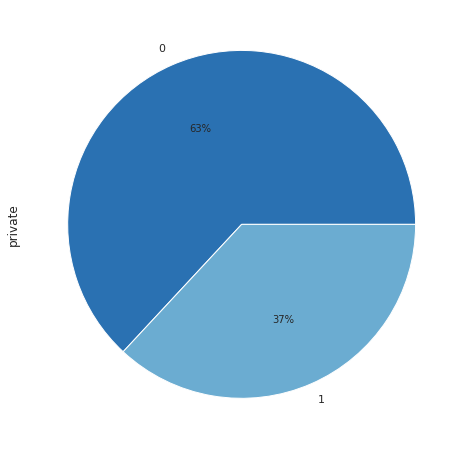

In [27]:
data_full.private.value_counts().sort_index().plot.pie(autopct='%1.0f%%',figsize=(8,8))

Como podemos observar un 63% de las cuentas son Publicas.

### ¿Como se relaciona con la variable de salida?

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

data_full[data_full.private == 1].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[1])
axes[1].set_title('Privado')

data_full[data_full.private == 0].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[0])
axes[0].set_title('Publico')

Text(0.5, 1.0, 'Publico')

En relación a la variable de salida podemos observar que:
* Un 45% de las cuentas públicas son genuinas. 
* Un 59% de las cuentas privadas son genuinas.

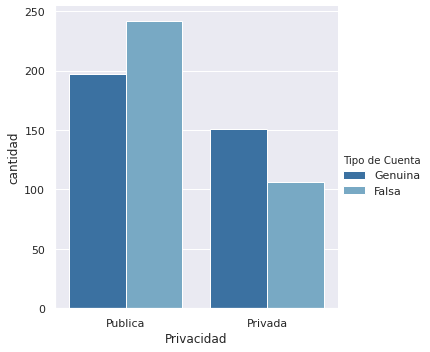

In [30]:
data = pd.DataFrame(
    {
        'Privacidad':['Publica','Privada','Publica','Privada'],
        'Tipo de Cuenta':['Genuina','Genuina','Falsa','Falsa'] ,
        'cantidad':
            [
                len(data_full[(data_full.private == 0) & (data_full.fake == 0)]),
                len(data_full[(data_full.private == 1) & (data_full.fake == 0)]),
                len(data_full[(data_full.private == 0) & (data_full.fake == 1)]),
                len(data_full[(data_full.private == 1) & (data_full.fake == 1)]),
            ]
    })
sns.factorplot(x='Privacidad',y='cantidad',data= data, hue='Tipo de Cuenta',kind='bar')

LLevando los porcentajes mencionados anteriormente a valores numericos, podemos observar que la mayor cantidad de cuentas falsas son públicas

## Variable name__username

Esta variable puede tomar dos posibles valores:
* 0: es distinto
* 1: es igual

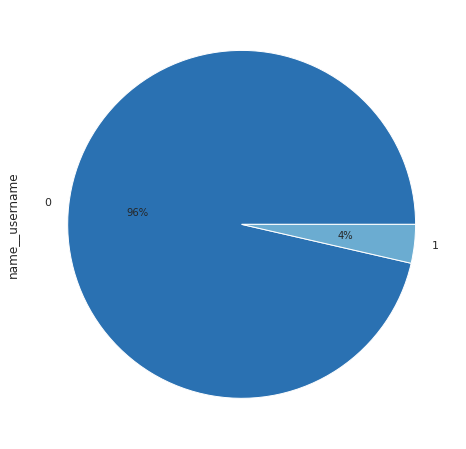

In [31]:
data_full.name__username.value_counts().sort_index().plot.pie(autopct='%1.0f%%',figsize=(8,8))

Podemos observar que esta variable esta completamente desbalanceada.

### ¿Como se relaciona con la variable de salida?

Text(0.5, 1.0, 'Distinto')

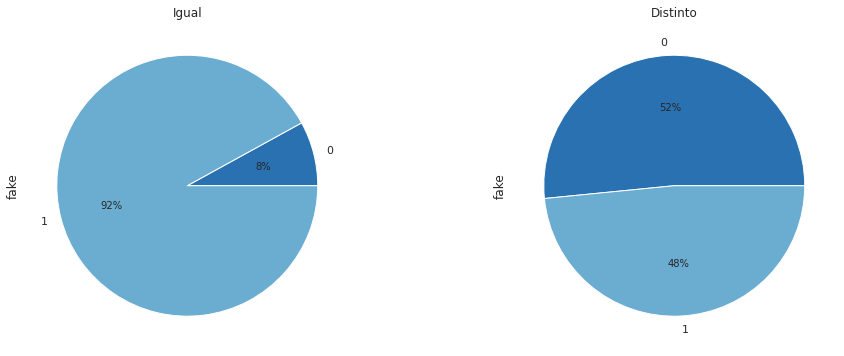

In [32]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

data_full[data_full.name__username == 1].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[0])
axes[0].set_title('Igual')

data_full[data_full.name__username == 0].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[1])
axes[1].set_title('Distinto')

Analizando los datos obtenemos que el 92% de las cuentas cuyo nombre es igual al username son falsas. Por otro lado si estos valores son distintos estan balanceados.

## Variable nums_div_length_username

Esta variable va a tomar valores ente 0 y 1. Ya que consite en una divicion entre la cantidad de numeros que tiene el username sobre la longitud total del mismo.

In [14]:
data_full['nums_div_length_username'].describe()

count    696.000000
mean       0.166609
std        0.218964
min        0.000000
25%        0.000000
50%        0.000000
75%        0.330000
max        0.920000
Name: nums_div_length_username, dtype: float64

In [33]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.swarmplot(data_full['nums_div_length_username'],ax=axes[0])
sns.kdeplot(data_full['nums_div_length_username'],ax=axes[1])

### ¿Como se relaciona con la variable de salida?

In [34]:
data_false = data_full[data_full.fake == 1]
data_true = data_full[data_full.fake == 0]

fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,10))

sns.kdeplot(data=data_false['nums_div_length_username'],label="Flasas",ax=axes, shade=True,cut=0)
sns.kdeplot(data=data_true['nums_div_length_username'],label="Genuinas",ax=axes, shade=True,cut=0)

Observando el grafico podriamos decir que las cuentas falsas tienen mas numeros en su username que las cuentas genuinas.

## Variable external_url

Esta variable puede tomar 2 valores:
* 0: No tiene 
* 1: Si tiene

In [35]:
data_full.external_url.value_counts().sort_index().plot.pie(autopct='%1.0f%%',figsize=(8,8))

Podemos observar que la variable no esta balanceada ya que solo el 11% tiene una url Externa

### ¿Como se relaciona con la variable de salida?

Text(0.5, 1.0, 'No tiene')

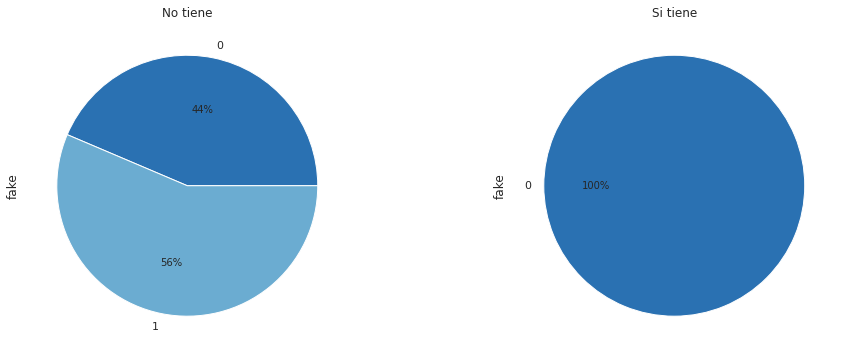

In [36]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

data_full[data_full.external_url == 1].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[1])
axes[1].set_title('Si tiene')

data_full[data_full.external_url == 0].fake.value_counts().sort_index().plot.pie(autopct='%1.0f%%', ax=axes[0])
axes[0].set_title('No tiene')

Gracias a estas graficas podriamos deducir que si la cuenta tiene url Externa esta es Genuina 

## Variable post

Esta variable contiene la cantidad de post que realizo la cuenta

In [19]:
data_full['posts'].describe()

count     696.000000
mean      103.244253
std       378.028168
min         0.000000
25%         0.000000
50%         9.000000
75%        77.000000
max      7389.000000
Name: posts, dtype: float64

In [37]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16,6))

sns.swarmplot(data_full['posts'],ax=axes[0])
sns.kdeplot(data_full['posts'],ax=axes[1])

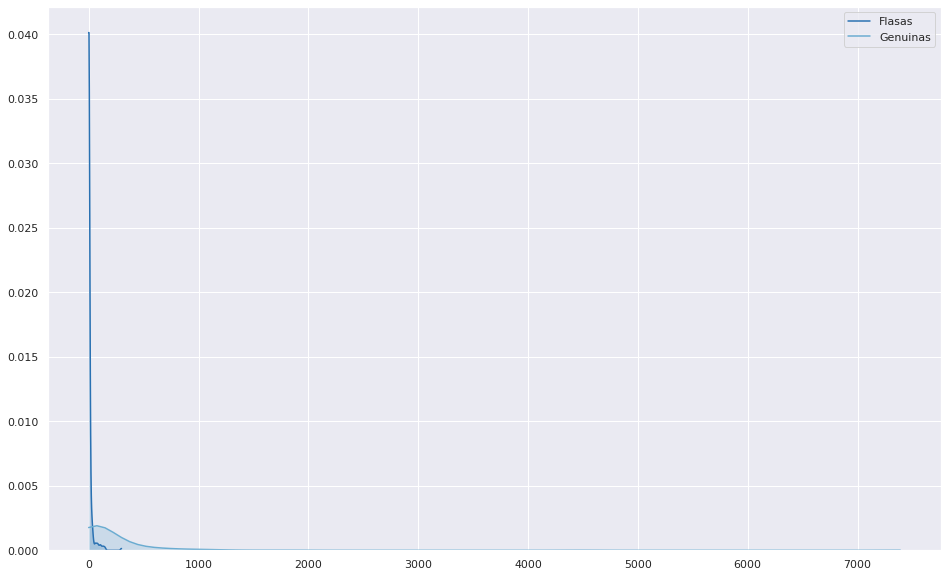

In [38]:
fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16,10))

sns.kdeplot(data=data_false['posts'],label="Flasas",ax=axes, shade=True,cut=0)
sns.kdeplot(data=data_true['posts'],label="Genuinas",ax=axes, shade=True,cut=0)

Como podemos observar en el gráfico las cuentas falsas generalmente tienen 0 post